# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np


airline_delays = pd.read_csv('data/airline_delays_1_year.csv')
airline_delays['date'] = pd.to_datetime(airline_delays['date'], format='%b-%Y')


In [49]:
airline_delays

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2021-01-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",110.0,1.0,0.63,0.00,0.38,0.0,0.00,2.0,0.0,32.0,20.0,0.0,12.0,0.0,0.0
1,2021-01-01,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",87.0,9.0,3.53,0.89,3.58,0.0,1.00,0.0,1.0,452.0,174.0,32.0,208.0,0.0,38.0
2,2021-01-01,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",79.0,7.0,3.87,1.00,2.13,0.0,0.00,0.0,0.0,969.0,351.0,541.0,77.0,0.0,0.0
3,2021-01-01,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,12.0,5.28,1.00,2.23,0.0,3.50,0.0,0.0,1093.0,247.0,519.0,49.0,0.0,278.0
4,2021-01-01,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",107.0,10.0,4.12,0.00,5.88,0.0,0.00,0.0,0.0,430.0,289.0,0.0,141.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18619,2020-12-01,YX,Republic Airline,MIA,"Miami, FL: Miami International",1085.0,95.0,31.63,3.65,42.56,1.0,16.16,2.0,0.0,4734.0,1815.0,286.0,1431.0,21.0,1181.0
18620,2020-12-01,YX,Republic Airline,MKE,"Milwaukee, WI: General Mitchell International",51.0,5.0,3.77,0.00,1.00,0.0,0.23,0.0,0.0,138.0,108.0,0.0,18.0,0.0,12.0
18621,2020-12-01,YX,Republic Airline,MLB,"Melbourne, FL: Melbourne International",34.0,2.0,1.22,0.00,0.73,0.0,0.05,0.0,0.0,43.0,27.0,0.0,15.0,0.0,1.0
18622,2020-12-01,YX,Republic Airline,MLI,"Moline, IL: Quad City International",19.0,1.0,1.00,0.00,0.00,0.0,0.00,1.0,0.0,114.0,114.0,0.0,0.0,0.0,0.0


In [2]:
airline_delays.head(10)

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2021-01-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",110.0,1.0,0.63,0.00,0.38,0.00,0.00,2.0,0.0,32.0,20.0,0.0,12.0,0.0,0.0
1,2021-01-01,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",87.0,9.0,3.53,0.89,3.58,0.00,1.00,0.0,1.0,452.0,174.0,32.0,208.0,0.0,38.0
2,2021-01-01,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",79.0,7.0,3.87,1.00,2.13,0.00,0.00,0.0,0.0,969.0,351.0,541.0,77.0,0.0,0.0
3,2021-01-01,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,12.0,5.28,1.00,2.23,0.00,3.50,0.0,0.0,1093.0,247.0,519.0,49.0,0.0,278.0
4,2021-01-01,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",107.0,10.0,4.12,0.00,5.88,0.00,0.00,0.0,0.0,430.0,289.0,0.0,141.0,0.0,0.0
5,2021-01-01,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5358.0,391.0,114.05,13.71,144.70,0.86,117.68,3.0,1.0,35063.0,16409.0,2003.0,7115.0,75.0,9461.0
6,2021-01-01,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",167.0,17.0,2.67,2.00,10.41,0.00,1.91,0.0,1.0,1928.0,581.0,922.0,277.0,0.0,148.0
7,2021-01-01,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",141.0,5.0,1.03,1.97,1.00,0.00,1.00,0.0,0.0,740.0,69.0,611.0,33.0,0.0,27.0
8,2021-01-01,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek Internat...",95.0,9.0,3.97,1.00,4.03,0.00,0.00,0.0,0.0,1062.0,891.0,66.0,105.0,0.0,0.0
9,2021-01-01,9E,Endeavor Air Inc.,BDL,"Hartford, CT: Bradley International",143.0,20.0,5.31,0.00,13.69,0.00,1.00,0.0,0.0,880.0,497.0,0.0,349.0,0.0,34.0


In [3]:
airline_delays.shape

(18624, 20)

In [4]:
airline_delays.columns

Index(['date', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [5]:
airline_delays.dtypes

date                   datetime64[ns]
carrier                        object
carrier_name                   object
airport                        object
airport_name                   object
arr_flights                   float64
arr_del15                     float64
carrier_ct                    float64
 weather_ct                   float64
nas_ct                        float64
security_ct                   float64
late_aircraft_ct              float64
arr_cancelled                 float64
arr_diverted                  float64
 arr_delay                    float64
 carrier_delay                float64
weather_delay                 float64
nas_delay                     float64
security_delay                float64
late_aircraft_delay           float64
dtype: object

In [6]:
pd.DataFrame(airline_delays.dtypes, columns=['Data Types'])

,Data Types
date,datetime64[ns]
carrier,object
carrier_name,object
airport,object
airport_name,object
arr_flights,float64
arr_del15,float64
carrier_ct,float64
weather_ct,float64
nas_ct,float64


In [7]:
airline_delays.isnull()

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18619,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18620,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18621,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18622,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
airline_delays

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2021-01-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",110.0,1.0,0.63,0.00,0.38,0.0,0.00,2.0,0.0,32.0,20.0,0.0,12.0,0.0,0.0
1,2021-01-01,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",87.0,9.0,3.53,0.89,3.58,0.0,1.00,0.0,1.0,452.0,174.0,32.0,208.0,0.0,38.0
2,2021-01-01,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",79.0,7.0,3.87,1.00,2.13,0.0,0.00,0.0,0.0,969.0,351.0,541.0,77.0,0.0,0.0
3,2021-01-01,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,12.0,5.28,1.00,2.23,0.0,3.50,0.0,0.0,1093.0,247.0,519.0,49.0,0.0,278.0
4,2021-01-01,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",107.0,10.0,4.12,0.00,5.88,0.0,0.00,0.0,0.0,430.0,289.0,0.0,141.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18619,2020-12-01,YX,Republic Airline,MIA,"Miami, FL: Miami International",1085.0,95.0,31.63,3.65,42.56,1.0,16.16,2.0,0.0,4734.0,1815.0,286.0,1431.0,21.0,1181.0
18620,2020-12-01,YX,Republic Airline,MKE,"Milwaukee, WI: General Mitchell International",51.0,5.0,3.77,0.00,1.00,0.0,0.23,0.0,0.0,138.0,108.0,0.0,18.0,0.0,12.0
18621,2020-12-01,YX,Republic Airline,MLB,"Melbourne, FL: Melbourne International",34.0,2.0,1.22,0.00,0.73,0.0,0.05,0.0,0.0,43.0,27.0,0.0,15.0,0.0,1.0
18622,2020-12-01,YX,Republic Airline,MLI,"Moline, IL: Quad City International",19.0,1.0,1.00,0.00,0.00,0.0,0.00,1.0,0.0,114.0,114.0,0.0,0.0,0.0,0.0


In [9]:
df.isna().sum()

NameError: name 'df' is not defined

In [ ]:
airline_delays.describe()

In [ ]:
cancelled = airline_delays['arr_cancelled']
cancelled.head(20)

In [10]:
airline_delays['carrier_delay']

KeyError: 'carrier_delay'

In [11]:
airline_delays['carrier'].unique()

array(['9E', 'AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'QX', 'UA', 'WN', 'YV', 'YX', 'EV'], dtype=object)

In [12]:
airline_delays.index

RangeIndex(start=0, stop=18624, step=1)

In [13]:
print(airline_delays.shape)
airline_delays.isnull().sum()

(18624, 20)


date                    0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            53
arr_del15              59
carrier_ct             53
 weather_ct            53
nas_ct                 53
security_ct            53
late_aircraft_ct       53
arr_cancelled          53
arr_diverted           53
 arr_delay             53
 carrier_delay         53
weather_delay          53
nas_delay              53
security_delay         53
late_aircraft_delay    53
dtype: int64

In [14]:
airline_delays.groupby('arr_flights', dropna=False)['carrier'].max().head(50)

arr_flights
1.0     YX
2.0     YX
3.0     YX
4.0     YX
5.0     YX
6.0     YX
7.0     YX
8.0     YX
9.0     YX
10.0    YX
11.0    YV
12.0    YX
13.0    YX
14.0    YX
15.0    YX
16.0    YX
17.0    YX
18.0    YX
19.0    YX
20.0    YX
21.0    YX
22.0    YX
23.0    YX
24.0    YX
25.0    YX
26.0    YX
27.0    YX
28.0    YX
29.0    YX
30.0    YX
31.0    YX
32.0    YX
33.0    YX
34.0    YX
35.0    YX
36.0    YX
37.0    YX
38.0    YX
39.0    YX
40.0    YX
41.0    YX
42.0    YX
43.0    YX
44.0    YV
45.0    YX
46.0    YX
47.0    YX
48.0    YX
49.0    YX
50.0    YX
Name: carrier, dtype: object

Text(0, 0.5, 'Airport Names')

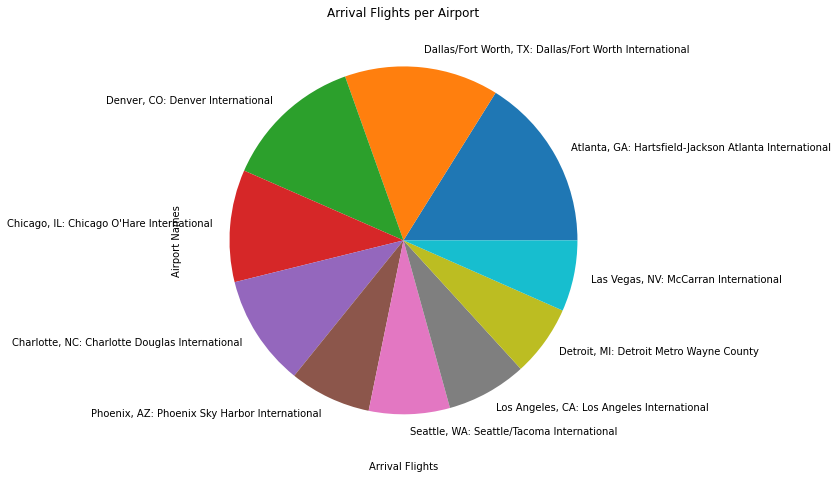

In [15]:
ax = (
    airline_delays
    .groupby('airport_name')
    .arr_flights
    .sum() 
    .sort_values(ascending=False) 
    .head(10) 
    .plot(
        kind='pie',
        figsize=(20,8),
        title='Arrival Flights per Airport',
    )
)

ax.set_xlabel('Arrival Flights');
ax.set_ylabel('Airport Names')

Text(0, 0.5, 'Airport Names')

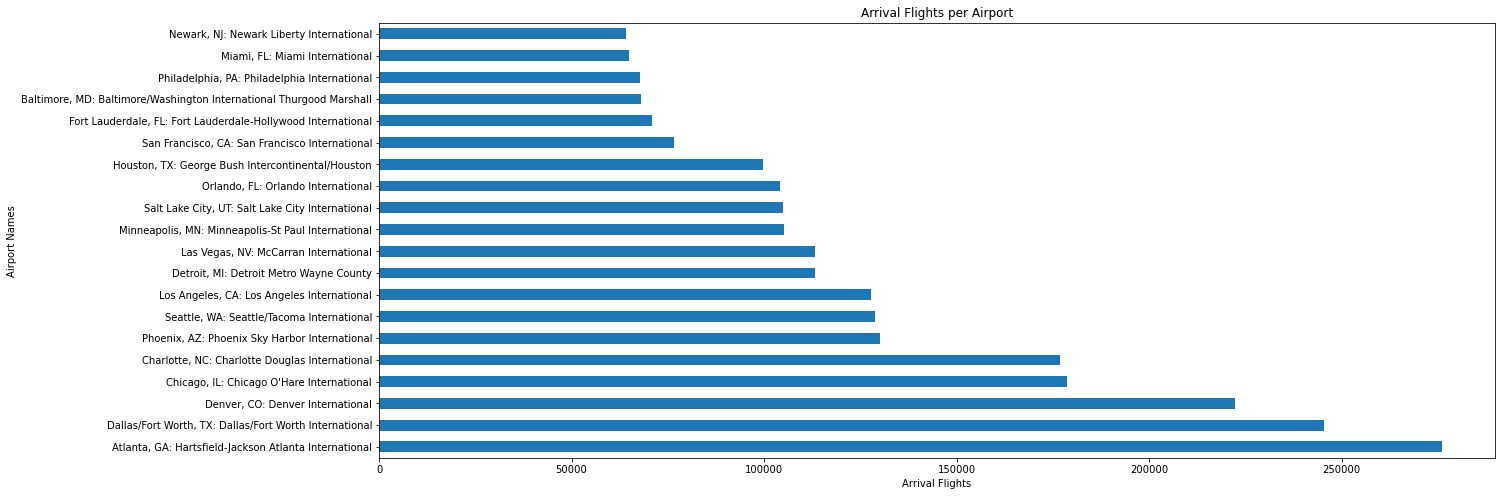

In [16]:
ax = (
    airline_delays
    .groupby('airport_name')
    .arr_flights
    .sum() 
    .sort_values(ascending=False) 
    .head(20) 
    .plot(
        kind='barh',
        figsize=(20,8),
        title='Arrival Flights per Airport',
    )
)

ax.set_xlabel('Arrival Flights');
ax.set_ylabel('Airport Names')

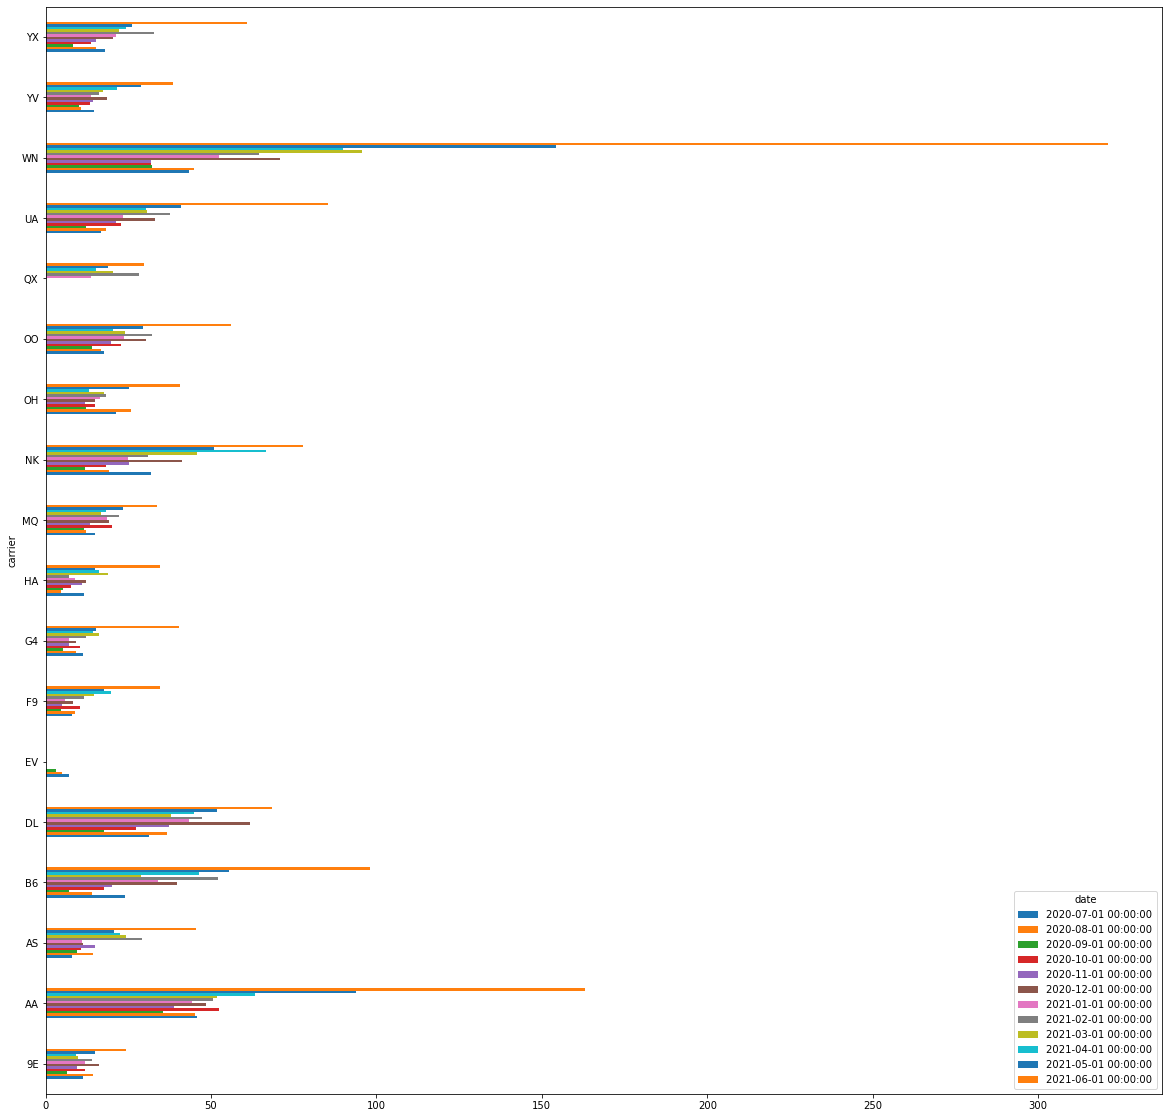

In [17]:
carrier_delay_by_month = pd.pivot_table(airline_delays, index="carrier", columns="date", values="arr_del15",)
carrier_delay_by_month.plot(kind='barh', figsize=(20,20));


In [18]:
null_df = pd.DataFrame(df.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values('Count of Nulls', ascending=False, inplace=True)
null_df.head(12)

NameError: name 'df' is not defined

In [19]:
arriving_flights = airline_delays.dropna(how='any', subset=['arr_flights'])
arriving_flights.shape
arriving_flights.head(20)

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2021-01-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",110.0,1.0,0.63,0.00,0.38,0.00,0.00,2.0,0.0,32.0,20.0,0.0,12.0,0.0,0.0
1,2021-01-01,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",87.0,9.0,3.53,0.89,3.58,0.00,1.00,0.0,1.0,452.0,174.0,32.0,208.0,0.0,38.0
2,2021-01-01,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",79.0,7.0,3.87,1.00,2.13,0.00,0.00,0.0,0.0,969.0,351.0,541.0,77.0,0.0,0.0
3,2021-01-01,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,12.0,5.28,1.00,2.23,0.00,3.50,0.0,0.0,1093.0,247.0,519.0,49.0,0.0,278.0
4,2021-01-01,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",107.0,10.0,4.12,0.00,5.88,0.00,0.00,0.0,0.0,430.0,289.0,0.0,141.0,0.0,0.0
5,2021-01-01,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5358.0,391.0,114.05,13.71,144.70,0.86,117.68,3.0,1.0,35063.0,16409.0,2003.0,7115.0,75.0,9461.0
6,2021-01-01,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",167.0,17.0,2.67,2.00,10.41,0.00,1.91,0.0,1.0,1928.0,581.0,922.0,277.0,0.0,148.0
7,2021-01-01,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",141.0,5.0,1.03,1.97,1.00,0.00,1.00,0.0,0.0,740.0,69.0,611.0,33.0,0.0,27.0
8,2021-01-01,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek Internat...",95.0,9.0,3.97,1.00,4.03,0.00,0.00,0.0,0.0,1062.0,891.0,66.0,105.0,0.0,0.0
9,2021-01-01,9E,Endeavor Air Inc.,BDL,"Hartford, CT: Bradley International",143.0,20.0,5.31,0.00,13.69,0.00,1.00,0.0,0.0,880.0,497.0,0.0,349.0,0.0,34.0


In [20]:
delay_df = arriving_flights[['carrier_name', 'airport_name', 'arr_flights', 'arr_del15']]

In [21]:
null_df = pd.DataFrame(airline_delays.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values('Count of Nulls', ascending=False, inplace=True)
null_df.head(12)

,Count of Nulls
Column,
arr_del15,59
security_ct,53
late_aircraft_ct,53
security_delay,53
nas_delay,53
weather_delay,53
carrier_delay,53
arr_delay,53
arr_diverted,53


In [22]:
type(delay_df)

pandas.core.frame.DataFrame

<AxesSubplot:>

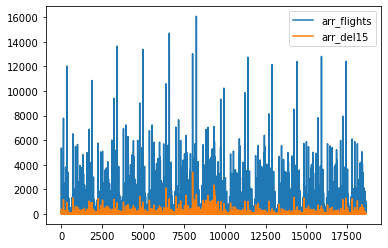

In [23]:
delay_df.plot()

In [24]:
def check_null_values(df):
    if df.isnull().values.any():
        display(df.isnull().sum())
    else:
        display("Null values don't exist")

In [25]:
groupby carrier-->arrival delays-->plot
groupby airport--> arrival delays-->plot


SyntaxError: invalid syntax (Temp/ipykernel_20392/385307621.py, line 1)

In [26]:
df = airline_delays.dropna(how='any', subset=['arr_flights'])

In [27]:
df[['carrier','arr_del15']].value_counts(ascending=True).head(20)

carrier  arr_del15
YX       1006.0       1
G4       53.0         1
         50.0         1
         47.0         1
UA       332.0        1
         343.0        1
G4       38.0         1
         58.0         1
UA       402.0        1
         468.0        1
         531.0        1
         590.0        1
         668.0        1
         694.0        1
         821.0        1
         409.0        1
         947.0        1
G4       61.0         1
         64.0         1
         92.0         1
dtype: int64

In [28]:
df.sort_values('carrier', ascending=True).head(10)

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2021-01-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",110.0,1.0,0.63,0.00,0.38,0.0,0.00,2.0,0.0,32.0,20.0,0.0,12.0,0.0,0.0
15673,2020-11-01,9E,Endeavor Air Inc.,OKC,"Oklahoma City, OK: Will Rogers World",21.0,1.0,0.59,0.00,0.41,0.0,0.00,0.0,0.0,37.0,22.0,0.0,15.0,0.0,0.0
15672,2020-11-01,9E,Endeavor Air Inc.,OAJ,"Jacksonville/Camp Lejeune, NC: Albert J Ellis",112.0,4.0,3.34,0.00,0.66,0.0,0.00,0.0,0.0,260.0,211.0,0.0,49.0,0.0,0.0
15671,2020-11-01,9E,Endeavor Air Inc.,MYR,"Myrtle Beach, SC: Myrtle Beach International",120.0,5.0,3.06,0.27,0.82,0.0,0.85,0.0,0.0,164.0,62.0,22.0,61.0,0.0,19.0
15670,2020-11-01,9E,Endeavor Air Inc.,MSP,"Minneapolis, MN: Minneapolis-St Paul Internati...",2406.0,98.0,38.77,2.00,26.03,0.0,31.20,0.0,1.0,6052.0,3147.0,123.0,1204.0,0.0,1578.0
15669,2020-11-01,9E,Endeavor Air Inc.,MSN,"Madison, WI: Dane County Regional-Truax Field",195.0,12.0,3.00,0.19,6.98,0.0,1.83,0.0,0.0,530.0,97.0,33.0,300.0,0.0,100.0
15668,2020-11-01,9E,Endeavor Air Inc.,MOT,"Minot, ND: Minot International",138.0,9.0,1.61,0.00,6.00,0.0,1.39,0.0,0.0,344.0,34.0,0.0,264.0,0.0,46.0
15667,2020-11-01,9E,Endeavor Air Inc.,MOB,"Mobile, AL: Mobile Regional",125.0,4.0,3.29,0.00,0.64,0.0,0.07,0.0,0.0,167.0,115.0,0.0,50.0,0.0,2.0
15666,2020-11-01,9E,Endeavor Air Inc.,MLU,"Monroe, LA: Monroe Regional",97.0,3.0,0.00,1.94,1.06,0.0,0.00,0.0,0.0,52.0,0.0,30.0,22.0,0.0,0.0
15665,2020-11-01,9E,Endeavor Air Inc.,MLI,"Moline, IL: Quad City International",68.0,2.0,0.33,0.00,1.67,0.0,0.00,0.0,1.0,39.0,8.0,0.0,31.0,0.0,0.0


In [29]:
carrier_groups = df.groupby('carrier')

In [30]:
carrier_groups.count().head(18)

,date,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier,,,,,,,,,,,,,,,,,,,
9E,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297
AA,1122,1122,1122,1122,1122,1121,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122
AS,847,847,847,847,847,846,847,847,847,847,847,847,847,847,847,847,847,847,847
B6,663,663,663,663,663,661,663,663,663,663,663,663,663,663,663,663,663,663,663
DL,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
EV,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
F9,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137
G4,1464,1464,1464,1464,1464,1463,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464
HA,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197


In [31]:
total_flights = df['arr_flights'].sum()

In [32]:
total_delays = df['arr_del15'].sum()

In [33]:
print(total_delays)

545569.0


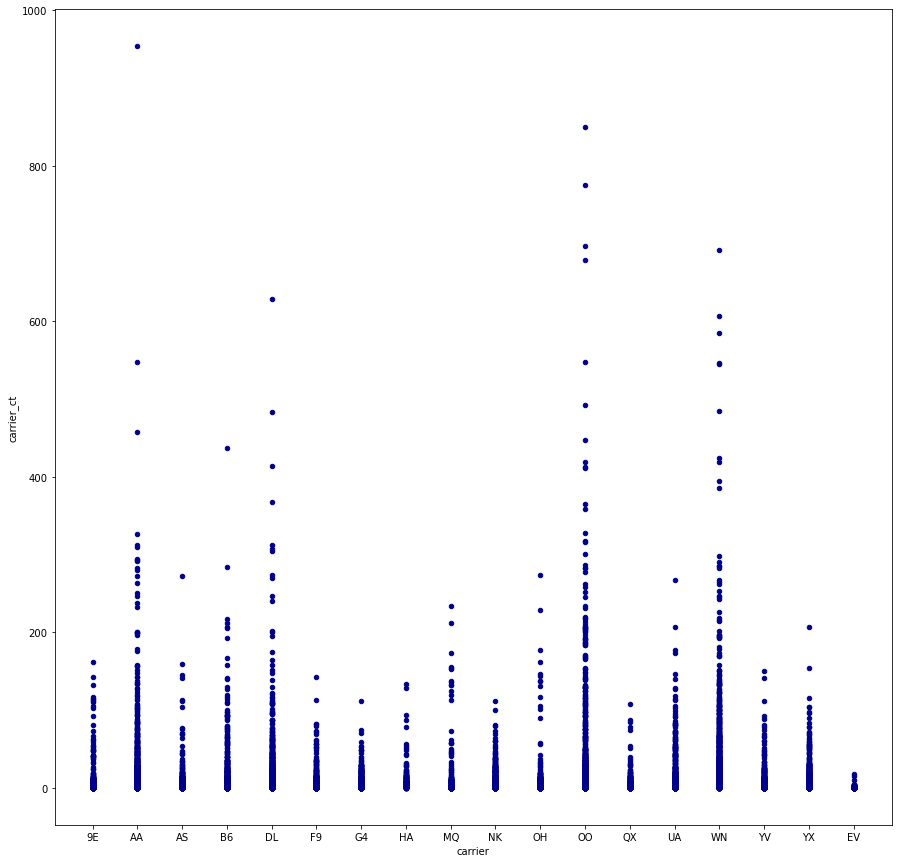

In [34]:
ax1 = df.plot.scatter(x='carrier',
                      y='carrier_ct',
                      c='DarkBlue', figsize=(15,15))

KeyError: "None of [Index(['weather_ct'], dtype='object')] are in the [columns]"

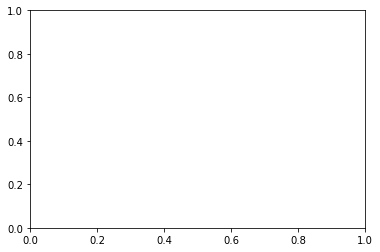

In [35]:
ax = df.boxplot(column='weather_ct')

<AxesSubplot:xlabel='carrier', ylabel='carrier_ct'>

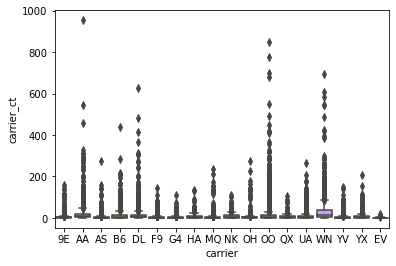

In [36]:
sns.boxplot(data=df, x='carrier', y='carrier_ct')

In [37]:
pd.plotting.scatter_matrix(
    df[['carrier', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']],
    figsize=(20, 20)
       );

KeyError: "['weather_ct'] not in index"

In [38]:
pd.crosstab(df['carrier'], df['airport'], values=df['arr_diverted'], aggfunc='sum').fillna('')

airport,ABE,ABI,ABQ,ABR,ABY,ACK,ACT,ACV,ACY,ADK,...,VEL,VLD,VPS,WRG,WYS,XNA,XWA,YAK,YKM,YUM
carrier,,,,,,,,,,,,,,,,,,,,,
9E,1.0,,,,1.0,1.0,,,,,...,,8.0,1.0,,,2.0,,,,
AA,,,1.0,,,,,,,,...,,,1.0,,,,,,,
AS,,,1.0,,,,,,,0.0,...,,,,8.0,,,,20.0,,
B6,,,0.0,,,2.0,,,,,...,,,,,,,,,,
DL,,,0.0,,,,,,,,...,,,1.0,,,,,,,
EV,,,0.0,,,,,,,,...,,,0.0,,,0.0,,,,
F9,,,0.0,,,,,,,,...,,,,,,0.0,,,,
G4,6.0,,0.0,,,,,,,,...,,,7.0,,,2.0,,,,
HA,,,,,,,,,,,...,,,,,,,,,,


## Displaying the airlines with the most flight cancellations as a percentage of total arriving flights

In [39]:
df_flights = df.groupby('carrier_name')['arr_flights'].sum().reset_index(name='num_arrived')
df_cancelled = df.groupby('carrier_name')['arr_cancelled'].sum().reset_index(name='num_cancelled')
df_cancelled = pd.merge(df_cancelled, df_flights, on='carrier_name')

df_cancelled['proportion'] = df_cancelled['num_cancelled'] / df_cancelled['num_arrived'] * 100

df_cancelled.sort_values(by=['proportion'], ascending=False).head(10)


,carrier_name,num_cancelled,num_arrived,proportion
6,ExpressJet Airlines LLC,273.0,8484.0,3.217822
8,Hawaiian Airlines Inc.,1212.0,39520.0,3.066802
11,Mesa Airlines Inc.,3337.0,136141.0,2.451135
9,Horizon Air,1286.0,57133.0,2.250888
5,Envoy Air,4324.0,216689.0,1.995487
1,Allegiant Air,1944.0,101805.0,1.909533
15,Southwest Airlines Co.,13662.0,890384.0,1.534394
0,Alaska Airlines Inc.,1904.0,143994.0,1.322277
2,American Airlines Inc.,7004.0,553371.0,1.265697
10,JetBlue Airways,1673.0,139096.0,1.202766


Text(0.5, 1.0, 'Number of Flights by Carrier and Month')

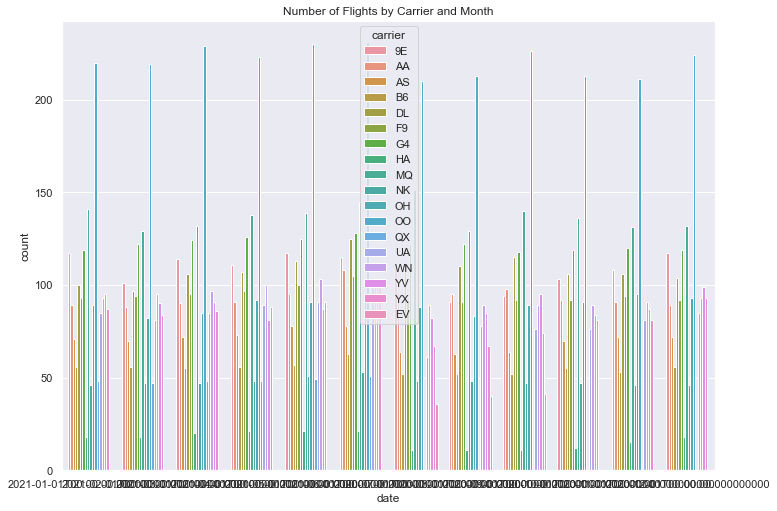

In [46]:
ax = sns.countplot(x='date',data=df,hue='carrier')
ax.set_title('Number of Flights by Carrier and Month')